In [13]:
%pip install pandas networkx matplotlib polars scipy pytest pytest-benchmark


   ---------------------------------------- 0/5 [py-cpuinfo]
   -------- ------------------------------- 1/5 [pluggy]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   ------------------------ --------------- 3/5 [pytest]
   -------------------------------- ------- 4/5 [pytest-benchmark]
   -------------------------------- ------- 4/5 [pytest-benchmark]
   -------------------------------- ------- 4/5 [pytest-benchma

In [22]:
# Assuming the initial edge list is generated in normal python
# order of speed: nummpy, polars, pandas, native python
#hand calculate, smaller networks
import random

num_nodes = 10  # can change
num_edges = 14  # can change

edges = []

for _ in range(num_edges):
    while True:
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)
        
        if node1 != node2:
            edge = (node1, node2)
            
            if edge not in edges and (node2, node1) not in edges:
                edges.append(edge)
                break

print("Sample edges:", edges[:10])

Sample edges: [(1, 4), (1, 5), (0, 7), (8, 0), (9, 2), (1, 2), (4, 5), (7, 6), (9, 0), (2, 5)]


In [14]:
# Assuming the initial edge list is generated in netx erdosrenyi / barabasi albert
# import networkx as nx

# num_nodes = 10000
# probability = 0.01 
# num_edges_per_node = 5

# erdos_renyi_graph = nx.erdos_renyi_graph(num_nodes, probability)
# print(f"Erdos-Renyi graph: {erdos_renyi_graph.number_of_nodes()} nodes, {erdos_renyi_graph.number_of_edges()} edges")

# barabasi_albert_graph = nx.barabasi_albert_graph(num_nodes, num_edges_per_node)
# print(f"Barabasi-Albert graph: {barabasi_albert_graph.number_of_nodes()} nodes, {barabasi_albert_graph.number_of_edges()} edges")

# erdos_renyi_edges = list(erdos_renyi_graph.edges())
# print(f"sample edges from Erdos-Renyi graph: {erdos_renyi_edges[:10]}")

# barabasi_albert_edges = list(barabasi_albert_graph.edges())
# print(f"Sample edges from Barabasi-Albert graph: {barabasi_albert_edges[:10]}")

In [5]:
# regular python functions
import timeit

def create_degree_list_python(edge_list, num_nodes):
    degree_count = [0] * num_nodes

    for u, v in edge_list:
        degree_count[u] += 1
        degree_count[v] += 1

    degree_list = [(node, degree_count[node]) for node in range(num_nodes) if degree_count[node] > 0]

    return degree_list


execution_time = timeit.timeit(lambda: create_degree_list_python(edges, num_nodes), number=100) / 100
print(list(create_degree_list_python(edges, num_nodes)))
print(f"Execution time: {execution_time} seconds")

[(0, 4), (2, 2), (3, 2), (4, 3), (5, 4), (6, 1), (7, 4), (8, 3), (9, 5)]
Execution time: 4.126999992877245e-06 seconds


In [23]:
# pandas
import pandas as pd
import timeit

def create_degree_list_pandas(all_nodes):
    degree_counts = all_nodes.value_counts(sort=False).reset_index()
    degree_counts.columns = ['node', 'degree']

    return zip(degree_counts['node'], degree_counts['degree'])

all_nodes = pd.DataFrame(edges, columns=['source', 'target']).melt(value_name='node')['node']
execution_time = timeit.timeit(lambda: create_degree_list_pandas(all_nodes), number=100) / 100
print(f'Execution time: {execution_time} seconds')
print(list(create_degree_list_pandas(all_nodes)))

Execution time: 0.0004403479999746196 seconds
[(1, 5), (0, 3), (8, 3), (9, 4), (4, 2), (7, 2), (2, 3), (3, 2), (5, 3), (6, 1)]


In [7]:
#netx
import timeit
import networkx as netx

def create_degree_listnetx(edge_list):
    G = netx.Graph()
    G.add_edges_from(edge_list)

    return G.degree()


execution_time = timeit.timeit(lambda: create_degree_listnetx(edges), number=100) / 100
print(f'Execution time: {execution_time} seconds')
print(list(create_degree_listnetx(edges)))

Execution time: 2.4894999951357024e-05 seconds
[(4, 3), (9, 5), (7, 4), (5, 4), (8, 3), (0, 4), (2, 2), (3, 2), (6, 1)]


In [8]:
# polars
import polars as pl
import timeit

def create_degree_list_polars(all_nodes_df):
    degrees = all_nodes_df.group_by('nodes').agg(pl.count('nodes').alias('degree'))

    return degrees

df = pl.DataFrame({'source': [edge[0] for edge in edges], 'target': [edge[1] for edge in edges]})  
all_nodes_df = pl.DataFrame({'nodes': pl.concat([df['source'], df['target']])}) 
execution_time = timeit.timeit(lambda: create_degree_list_polars(all_nodes_df), number=100) / 100
print(f'Execution time: {execution_time} seconds')
print(create_degree_list_polars(all_nodes_df).to_dict(as_series=False))

Execution time: 0.00010100500003318302 seconds
{'nodes': [6, 0, 2, 4, 7, 5, 9, 8, 3], 'degree': [1, 4, 2, 3, 4, 4, 5, 3, 2]}


In [24]:
# using numpy
import timeit
import numpy as np

def create_degree_list_numpy(edges_array):
    all_nodes = edges_array.ravel() 
    
    unique_nodes, counts = np.unique(all_nodes, return_counts=True)
    
    return np.column_stack((unique_nodes, counts))

edges_array = np.array(edges)
execution_time = timeit.timeit(lambda: create_degree_list_numpy(edges_array), number=100) / 100
print(f"Execution time: {execution_time} seconds")
print(create_degree_list_numpy(edges_array).tolist())

Execution time: 3.068799996981397e-05 seconds
[[0, 3], [1, 5], [2, 3], [3, 2], [4, 2], [5, 3], [6, 1], [7, 2], [8, 3], [9, 4]]


Matplotlib is building the font cache; this may take a moment.


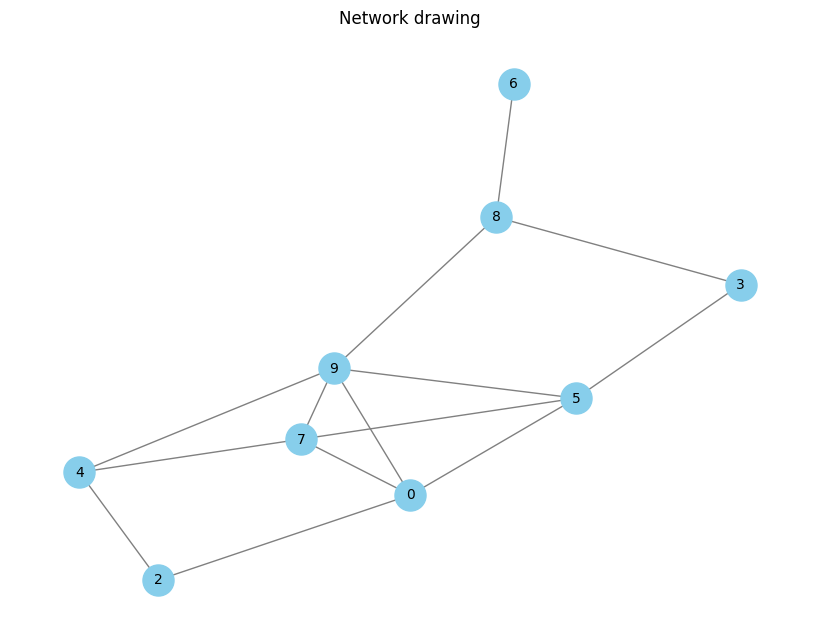

In [10]:
#drawing the networks

import networkx as netx
import matplotlib.pyplot as plt

def visualize(edge_list):
 G = netx.Graph()
 G.add_edges_from(edge_list)

 plt.figure(figsize = (8,6))
 netx.draw(G,
          with_labels=True,
          node_color='skyblue',
         node_size=500,
        edge_color='gray',
          font_size=10)
 plt.title("Network drawing")
 plt.show()


visualize(edges)

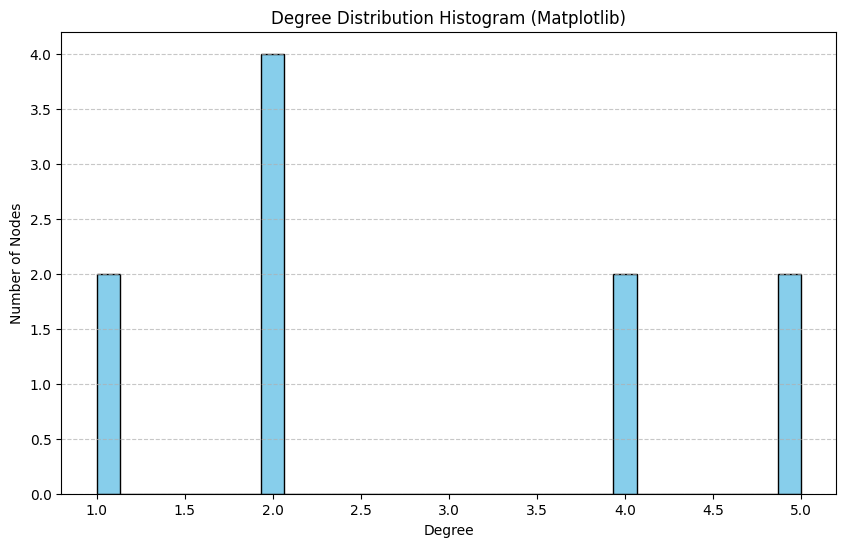

In [21]:
# histogram using matplotlib
import matplotlib.pyplot as plt

def plot_degree_histogram_matplotlib(degree_list):
    degrees = [degree for _, degree in degree_list]

    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution Histogram (Matplotlib)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

edges_array = np.array(edges)
degree_list = create_degree_list_numpy(edges_array)
plot_degree_histogram_matplotlib(degree_list)

# plot both ernos and barabasi graphs
# explain screenshot (scale free / power law graphs)

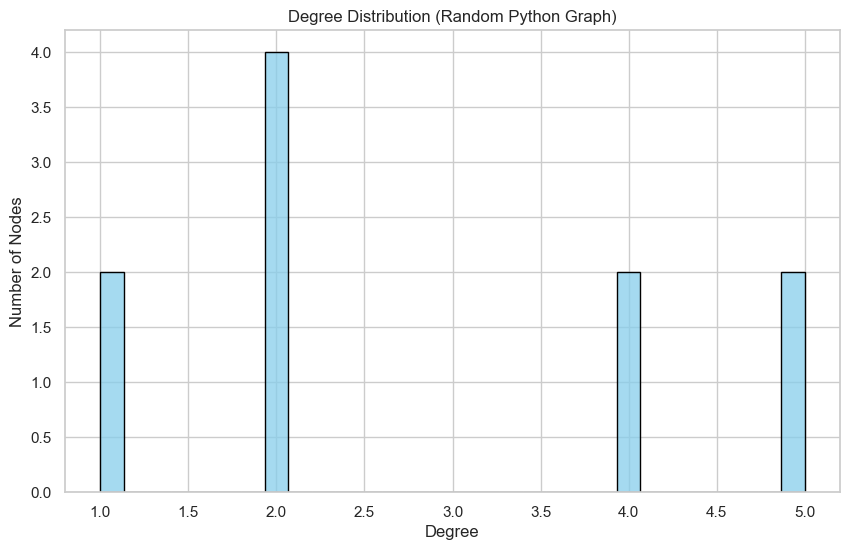

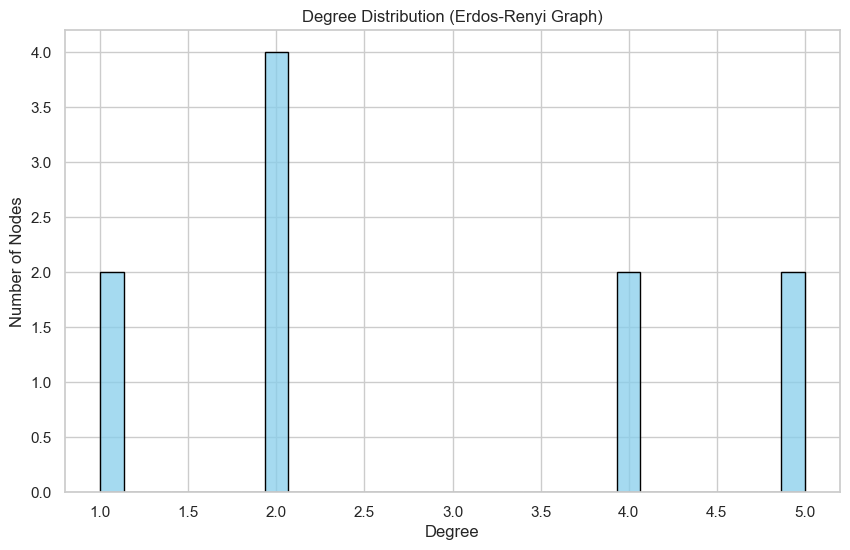

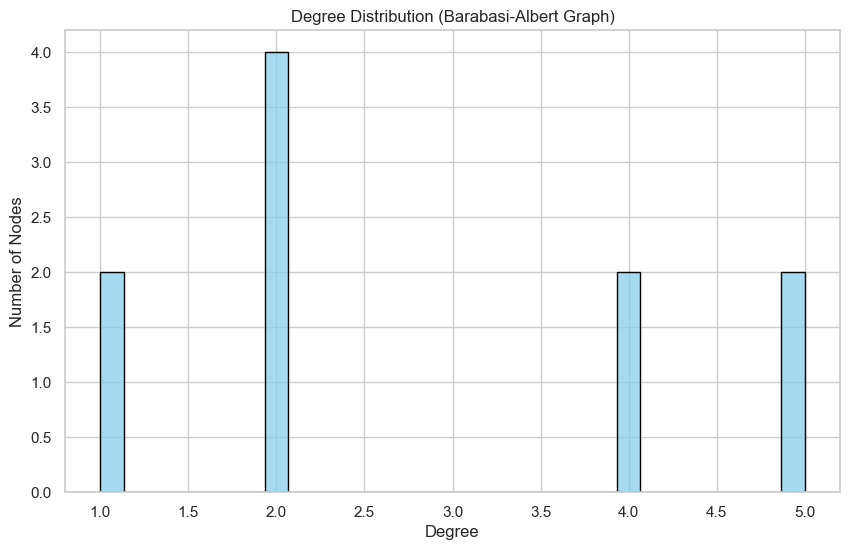

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_degree_histogram_seaborn(degree_list, title):
    degrees = [degree for _, degree in degree_list]

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(degrees, bins=30, kde=False, color='skyblue', edgecolor='black') \
        .set(title=title, xlabel='Degree', ylabel='Number of Nodes')
    plt.show()

edges_array = np.array(edges)
erdos_renyi_array = np.array(edges)
barabasi_albert_array = np.array(edges)

degree_list = create_degree_list_numpy(edges_array)
degreeErdos_list = create_degree_list_numpy(erdos_renyi_array)
degreeBarabasi_list = create_degree_list_numpy(barabasi_albert_array)

plot_degree_histogram_seaborn(degree_list, "Degree Distribution (Random Python Graph)")
plot_degree_histogram_seaborn(degreeErdos_list, "Degree Distribution (Erdos-Renyi Graph)")
plot_degree_histogram_seaborn(degreeBarabasi_list, "Degree Distribution (Barabasi-Albert Graph)")

In [12]:
#comparing execution times of different methods for degree distribution
import matplotlib.pyplot as plt
import timeit

edge_sizes = [100, 1000]
execution_times = {"Python": [], "Pandas": [], "Polars": [], "NumPy": []}

for num_edges in edge_sizes:
    edges = []
    for _ in range(num_edges):
        while True:
            node1 = random.randint(0, num_nodes - 1)
            node2 = random.randint(0, num_nodes - 1)
            if node1 != node2:
                edge = (node1, node2)
                if edge not in edges and (node2, node1) not in edges:
                    edges.append(edge)
                    break
    # Python
    execution_times["Python"].append(timeit.timeit(lambda: create_degree_list_python(edges, num_nodes), number=100) / 100) 
    # Pandas
    all_nodes = pd.DataFrame(edges, columns=['source', 'target']).melt(value_name='node')['node']
    execution_times["Pandas"].append(timeit.timeit(lambda: create_degree_list_pandas(all_nodes), number=100) / 100)
    # Polars
    df = pl.DataFrame({'source': [edge[0] for edge in edges], 'target': [edge[1] for edge in edges]})  
    all_nodes_df = pl.DataFrame({'nodes': pl.concat([df['source'], df['target']])}) 
    execution_times["Polars"].append(timeit.timeit(lambda: create_degree_list_polars(all_nodes_df), number=100) / 100)
    # NumPy
    edges_array = np.array(edges)
    execution_times["NumPy"].append(timeit.timeit(lambda: create_degree_list_numpy(edges_array), number=100) / 100)

for method in execution_times:
    if len(execution_times[method]) < len(edge_sizes):
        execution_times[method] += [None] * (len(edge_sizes) - len(execution_times[method]))

plt.figure(figsize=(10, 6))
for method, times in execution_times.items():
    plt.plot(edge_sizes, times, marker='o', label=method)

plt.xscale('log')
plt.xlabel('Number of Edges')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times for Degree Distribution Methods')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

KeyboardInterrupt: 

In [25]:
import pandas as pd
import numpy as np

# Ensure edges is a list of tuples, not a numpy array of shape (N,2,2) or similar
# and that it matches the format expected by create_degree_list_numpy
edges_array = np.array(edges)
degree_counts = create_degree_list_numpy(edges_array)
df = pd.DataFrame(degree_counts, columns=["node", "degree"])
df = df.sort_values("node").reset_index(drop=True)
print("Edges:", edges)
print("Degree counts:\n", df)
df.to_csv("notebook_degree_counts.csv", index=False)
df

Edges: [(1, 4), (1, 5), (0, 7), (8, 0), (9, 2), (1, 2), (4, 5), (7, 6), (9, 0), (2, 5), (1, 9), (8, 1), (3, 9), (8, 3)]
Degree counts:
    node  degree
0     0       3
1     1       5
2     2       3
3     3       2
4     4       2
5     5       3
6     6       1
7     7       2
8     8       3
9     9       4


,node,degree
0,0,3
1,1,5
2,2,3
3,3,2
4,4,2
5,5,3
6,6,1
7,7,2
8,8,3
9,9,4


Thanks!